# Практика 4.2


In [179]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering, KMeans


## Загрузка и ознакомление с данными


In [180]:
app_data = pd.read_csv("application_data.csv")
app_data


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
app_data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Рассмотрим содержимое колонок подробнее


In [182]:
app_data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [183]:
for (columnName, columnData) in app_data.iteritems():
    print("==================== " + columnName + " ==================")
    print(app_data[columnName].describe())
    if (columnData.dtype == object):
        print(app_data[columnName].unique())


C:\Users\roman\AppData\Local\Temp\ipykernel_50716\1049979280.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in app_data.iteritems():


==================== SK_ID_CURR ==================
count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
==================== TARGET ==================
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
==================== NAME_CONTRACT_TYPE ==================
count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object
['Cash loans' 'Revolving loans']
==================== CODE_GENDER ==================
count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object
['M' 'F' 'XNA']
==================== FLAG_OWN_CAR ==================
count     307511
unique         2


## Предобработка данных


`CODE_GENDER` - содержит 3 значения

Пометим 'XNA' как null


In [184]:
app_data["CODE_GENDER"].unique()


array(['M', 'F', 'XNA'], dtype=object)

In [185]:
app_data["CODE_GENDER"] = app_data["CODE_GENDER"].apply(
    lambda x: x if x != 'XNA' else pd.NA)
app_data["ORGANIZATION_TYPE"] = app_data["ORGANIZATION_TYPE"].apply(
    lambda x: x if x != 'XNA' else pd.NA)


### Поиск неполных данных


In [186]:
nulls = pd.DataFrame(app_data.isnull().sum().reset_index())
nulls.columns = ["column", "value"]
nulls = nulls[nulls["value"] > 0]
nulls["percent"] = nulls["value"] / app_data.shape[0] * 100
nulls


,column,value,percent
3,CODE_GENDER,4,0.001301
9,AMT_ANNUITY,12,0.003902
10,AMT_GOODS_PRICE,278,0.090403
11,NAME_TYPE_SUITE,1292,0.420148
21,OWN_CAR_AGE,202929,65.990810
...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [187]:
many_nulls = nulls[nulls["percent"] > 33]
many_nulls.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 21 to 90
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   column   49 non-null     object 
 1   value    49 non-null     int64  
 2   percent  49 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


В данных 49 колонок с более чем 33% пропусками в данных. Эти колонки первые кандидаты на исключение из работы.


In [188]:
many_nulls


,column,value,percent
21,OWN_CAR_AGE,202929,65.990810
41,EXT_SOURCE_1,173378,56.381073
44,APARTMENTS_AVG,156061,50.749729
45,BASEMENTAREA_AVG,179943,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
47,YEARS_BUILD_AVG,204488,66.497784
48,COMMONAREA_AVG,214865,69.872297
49,ELEVATORS_AVG,163891,53.295980
50,ENTRANCES_AVG,154828,50.348768
51,FLOORSMAX_AVG,153020,49.760822


In [189]:
columns_to_delete = set()
for el in many_nulls["column"].tolist():
    columns_to_delete.add(el)
columns_to_delete.add("SK_ID_CURR")  # ID
columns_to_delete


{'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'OWN_CAR_AGE',
 'SK_ID_CURR',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MOD

### Поиск невлияющих на результат поляей


In [190]:
flag_doc_cols = []
for i in range(2, 22):
    flag_doc_cols.append("FLAG_DOCUMENT_" + str(i))

flags = app_data[flag_doc_cols]
print("Column", end="\t")
print(" | ", end="\t")
print("Non zero", end="\t")
print(" | ", end="\t")
print("Zero", end="\t")
print(" | ", end="\t")
print("Ratio")
for (columnName, columnData) in flags.iteritems():
    print(columnName, end="\t")
    print(" | ", end="\t")
    series = flags[columnName]
    count = series.shape[0]
    non_zero_count = series.where(series > 0).count()
    zero_count = series.where(series == 0).count()
    print(non_zero_count, end="\t")
    print(" | ", end="\t")
    print(zero_count, end="\t")
    print(" | ", end="\t")
    print(round(non_zero_count/count, 3))


Column	 | 	Non zero	 | 	Zero	 | 	Ratio
FLAG_DOCUMENT_2	 | 	13	 | 	307498	 | 	0.0
FLAG_DOCUMENT_3	 | 	218340	 | 	89171	 | 	0.71
FLAG_DOCUMENT_4	 | 	25	 | 	307486	 | 	0.0
FLAG_DOCUMENT_5	 | 	4648	 | 	302863	 | 	0.015
FLAG_DOCUMENT_6	 | 	27078	 | 	280433	 | 	0.088
FLAG_DOCUMENT_7	 | 	59	 | 	307452	 | 	0.0
FLAG_DOCUMENT_8	 | 	25024	 | 	282487	 | 	0.081
FLAG_DOCUMENT_9	 | 	1198	 | 	306313	 | 	0.004
FLAG_DOCUMENT_10	 | 	7	 | 	307504	 | 	0.0
FLAG_DOCUMENT_11	 | 	1203	 | 	306308	 | 	0.004
FLAG_DOCUMENT_12	 | 	2	 | 	307509	 | 	0.0
FLAG_DOCUMENT_13	 | 	1084	 | 	306427	 | 	0.004
FLAG_DOCUMENT_14	 | 	903	 | 	306608	 | 	0.003
FLAG_DOCUMENT_15	 | 	372	 | 	307139	 | 	0.001
FLAG_DOCUMENT_16	 | 	3053	 | 	304458	 | 	0.01
FLAG_DOCUMENT_17	 | 	82	 | 	307429	 | 	0.0
FLAG_DOCUMENT_18	 | 	2500	 | 	305011	 | 	0.008
FLAG_DOCUMENT_19	 | 	183	 | 	307328	 | 	0.001
FLAG_DOCUMENT_20	 | 	156	 | 	307355	 | 	0.001
FLAG_DOCUMENT_21	 | 	103	 | 	307408	 | 	0.0


C:\Users\roman\AppData\Local\Temp\ipykernel_50716\3438895843.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in flags.iteritems():


В поле `FLAG_DOCUMENT_3` позыват множество предоставленных дкументов. Остальные флаги устанавливаются кране редко. Оставим поля, короторые указаны в 10% и более случаев.


In [191]:
flag_doc_cols.remove("FLAG_DOCUMENT_3")

for el in flag_doc_cols:
    columns_to_delete.add(el)
columns_to_delete


{'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTM

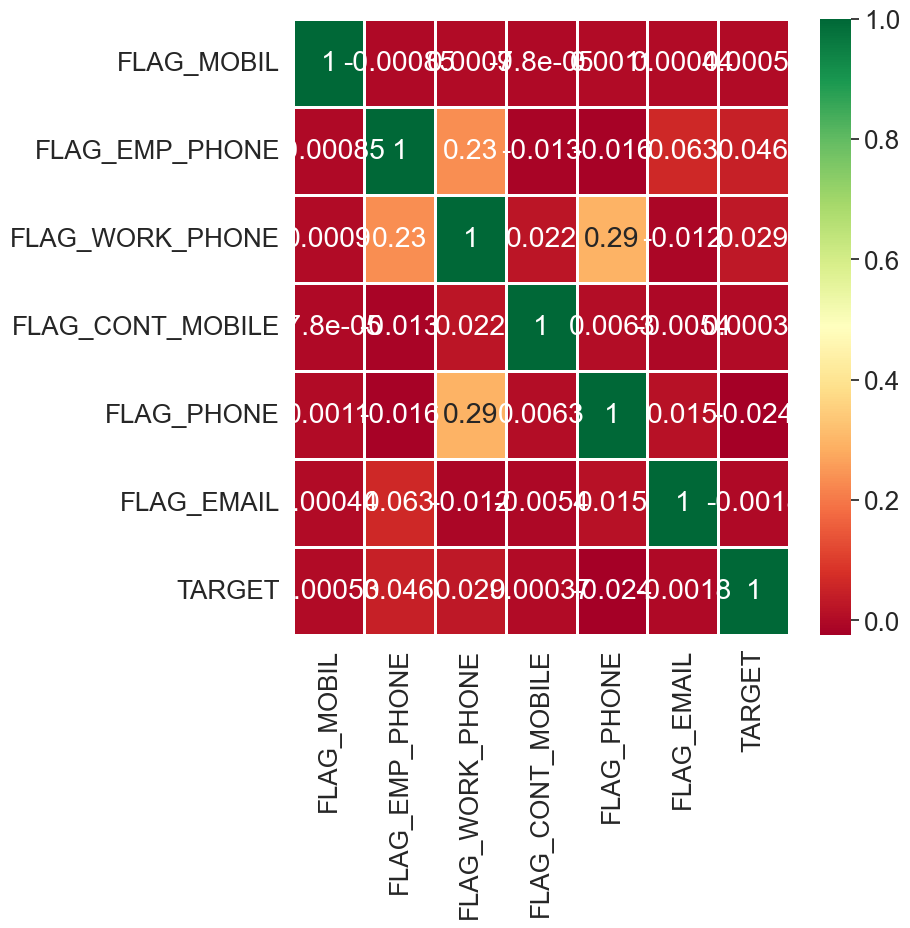

In [192]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
               'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']
Contact_corr = app_data[contact_col].corr()
fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(Contact_corr,
                 xticklabels=Contact_corr.columns,
                 yticklabels=Contact_corr.columns,
                 annot=True,
                 cmap="RdYlGn",
                 linewidth=1)


Нет корреляции контактных данных с `TARGET`. Можно удалить колонки.


In [193]:
contact_col.remove('TARGET')

for el in contact_col:
    columns_to_delete.add(el)

columns_to_delete


{'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'LANDAREA_AV

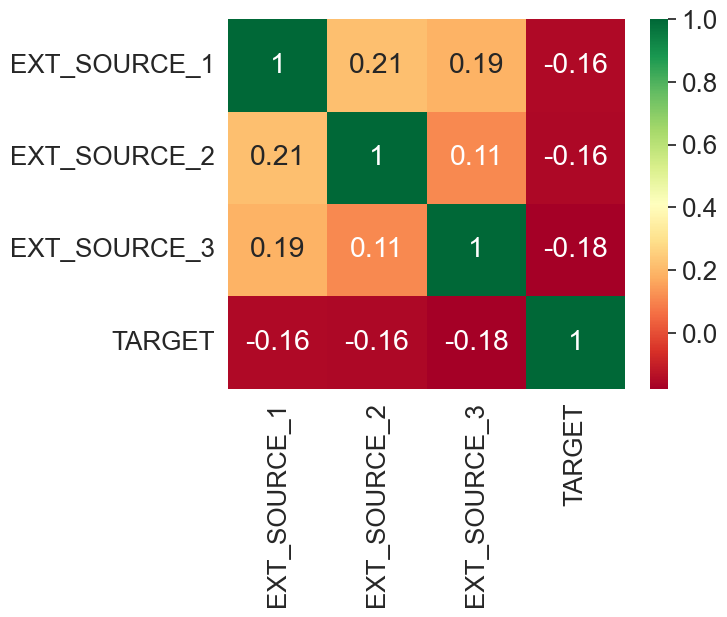

In [194]:
source_corr = app_data[["EXT_SOURCE_1",
                        "EXT_SOURCE_2", "EXT_SOURCE_3", "TARGET"]].corr()
ax = sns.heatmap(source_corr,
                 xticklabels=source_corr.columns,
                 yticklabels=source_corr.columns,
                 annot=True,
                 cmap="RdYlGn")


Нет корреляции контактных данных с `TARGET`. Можно удалить колонки.


In [195]:
for el in ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]:
    columns_to_delete.add(el)
len(columns_to_delete)


77

Итого к удалению 77 полей


In [196]:
app_data.drop(labels=columns_to_delete, axis=1, inplace=True)
app_data


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0.0,0.0,-273.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,6.0,0.0,-1909.0,1,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,-322.0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
app_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307507 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

### Заполенение пустых значений


In [198]:
for (columnName, columnData) in app_data.iteritems():
    print("==================== " + columnName + " ==================")
    print(app_data[columnName].describe())
    if (columnData.dtype == object):
        print(app_data[columnName].unique())


==================== TARGET ==================
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
==================== NAME_CONTRACT_TYPE ==================
count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object
['Cash loans' 'Revolving loans']
==================== CODE_GENDER ==================
count     307507
unique         2
top            F
freq      202448
Name: CODE_GENDER, dtype: object
['M' 'F' <NA>]
==================== FLAG_OWN_CAR ==================
count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object
['N' 'Y']
==================== FLAG_OWN_REALTY ==================
count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY, dtype: object
['Y' 'N']
====================

C:\Users\roman\AppData\Local\Temp\ipykernel_50716\1049979280.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in app_data.iteritems():


count      307511
unique          6
top       Married
freq       196432
Name: NAME_FAMILY_STATUS, dtype: object
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
==================== NAME_HOUSING_TYPE ==================
count                307511
unique                    6
top       House / apartment
freq                 272868
Name: NAME_HOUSING_TYPE, dtype: object
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
==================== REGION_POPULATION_RELATIVE ==================
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64
==================== DAYS_BIRTH ==================
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -1575

In [199]:
app_data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
app_data['ORGANIZATION_TYPE'].fillna('Other', inplace=True)

for (columnName, columnData) in app_data.iteritems():
    if (columnData.dtype == object):
        app_data[columnName].fillna(
            (app_data[columnName].mode()[0]), inplace=True)
    else:
        app_data[columnName].fillna(
            (app_data[columnName].mean()), inplace=True)


C:\Users\roman\AppData\Local\Temp\ipykernel_50716\2700923728.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in app_data.iteritems():


In [200]:
nulls = pd.DataFrame(app_data.isnull().sum().reset_index())
nulls.columns = ["column", "value"]
nulls


,column,value
0,TARGET,0
1,NAME_CONTRACT_TYPE,0
2,CODE_GENDER,0
3,FLAG_OWN_CAR,0
4,FLAG_OWN_REALTY,0
5,CNT_CHILDREN,0
6,AMT_INCOME_TOTAL,0
7,AMT_CREDIT,0
8,AMT_ANNUITY,0
9,AMT_GOODS_PRICE,0


### Преобразование отрицательных значений

In [201]:
for (columnName, columnData) in app_data.iteritems():
    if (columnData.dtype != object):
        app_data[columnName] = app_data[columnName].abs()


C:\Users\roman\AppData\Local\Temp\ipykernel_50716\28100420.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in app_data.iteritems():


### Удаление выбросов


Для наглядности построим диаграммы для не категориальных данных


C:\Users\roman\AppData\Local\Temp\ipykernel_50716\1502090266.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in app_data.iteritems():


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

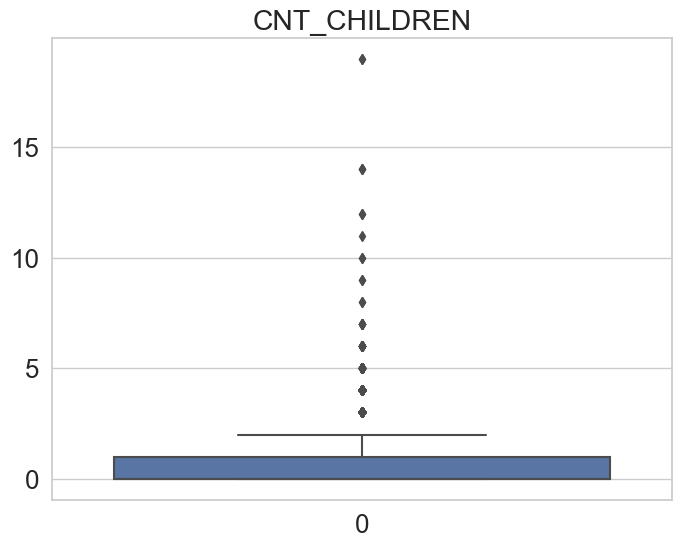

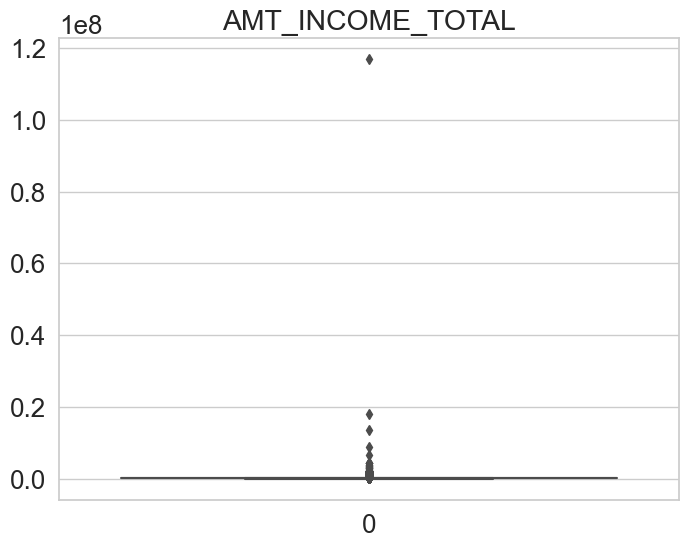

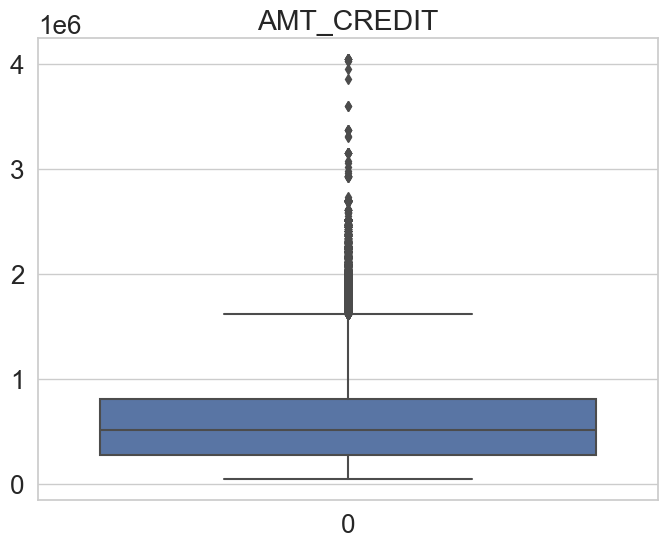

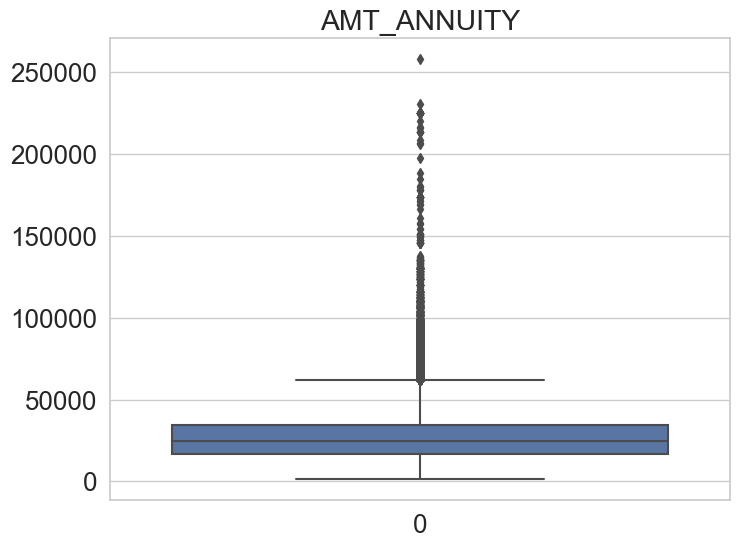

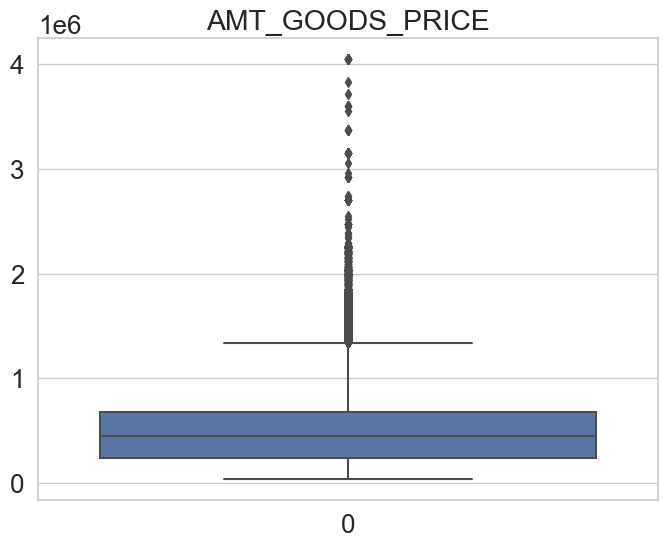

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

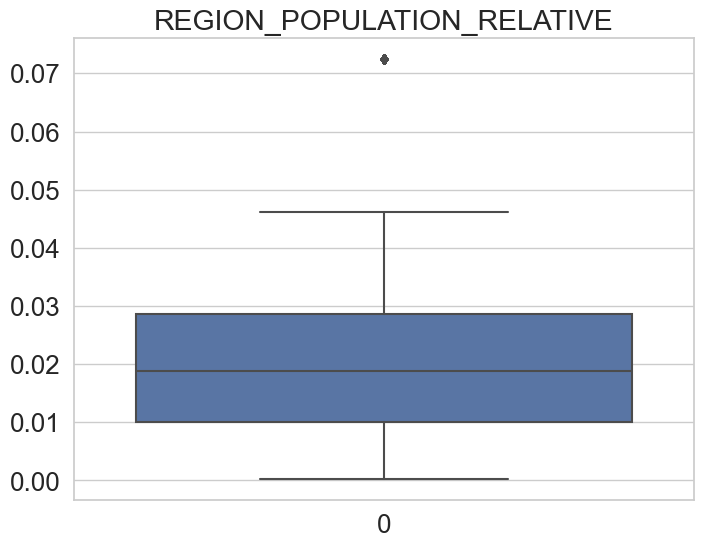

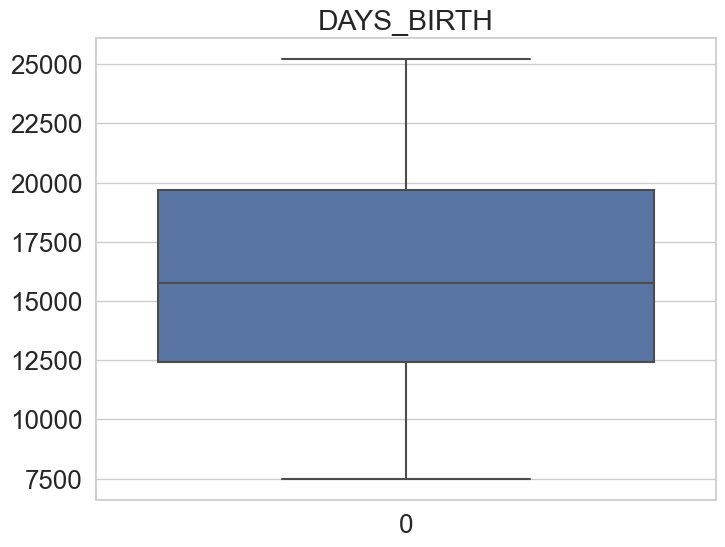

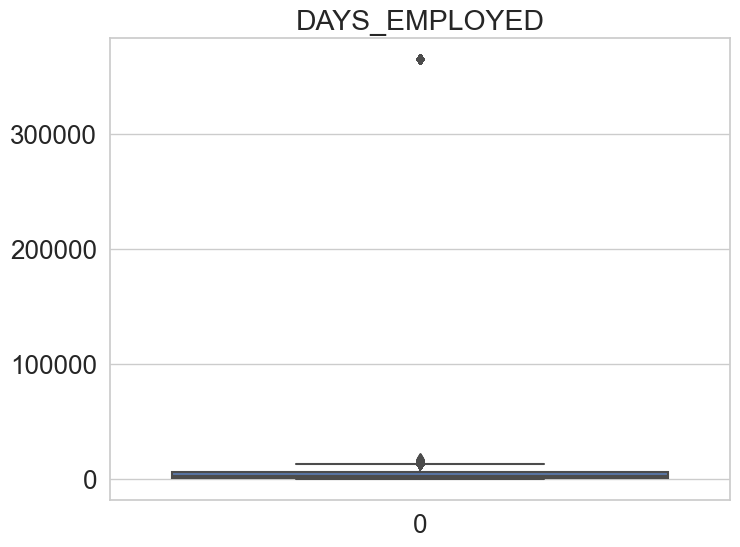

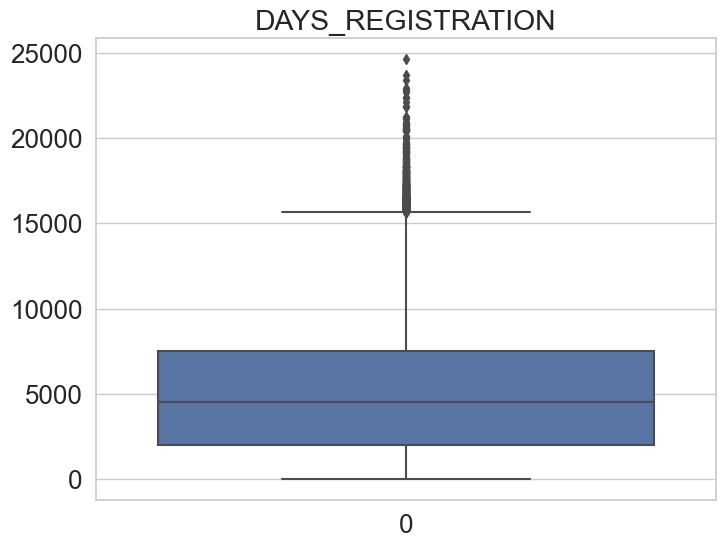

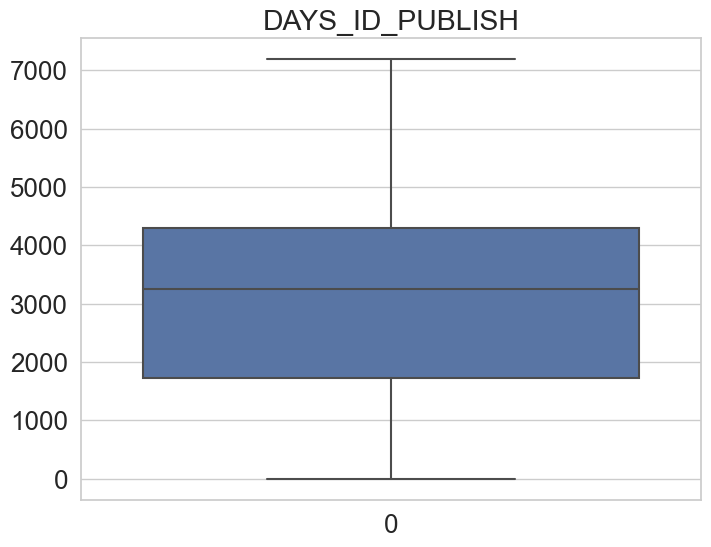

<Figure size 800x600 with 0 Axes>

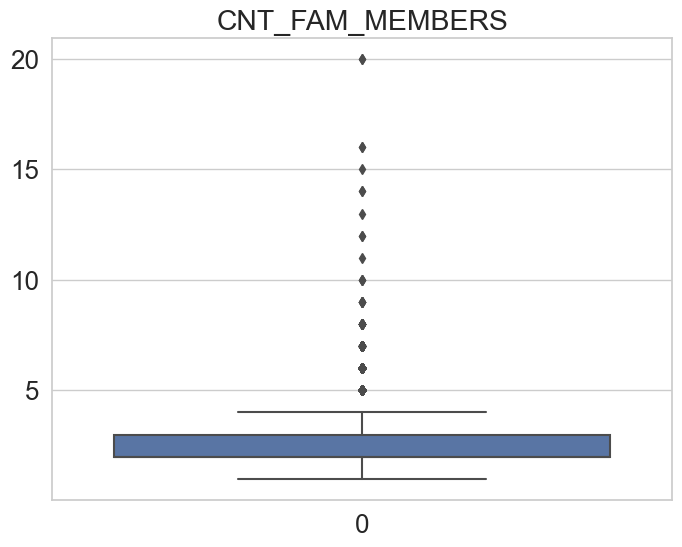

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

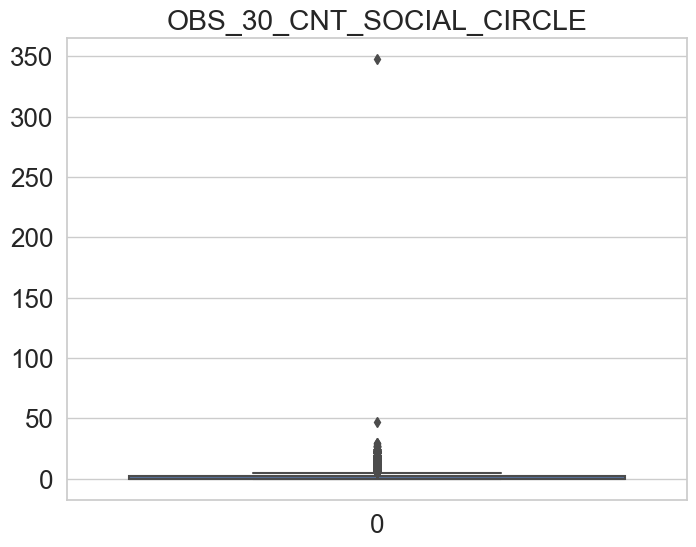

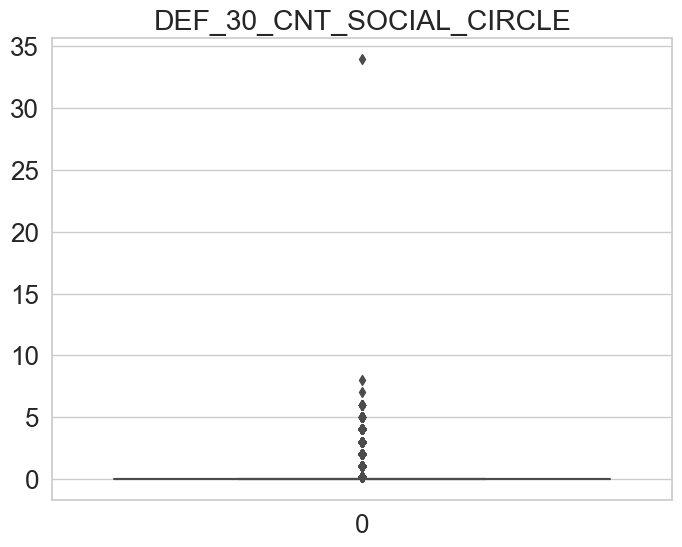

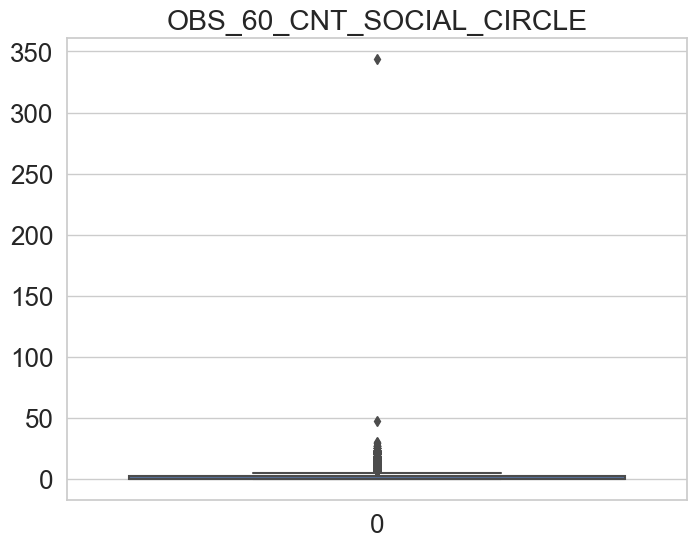

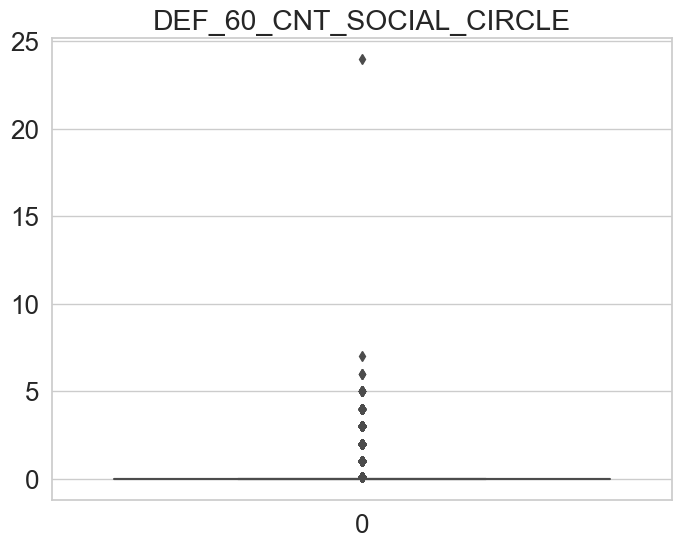

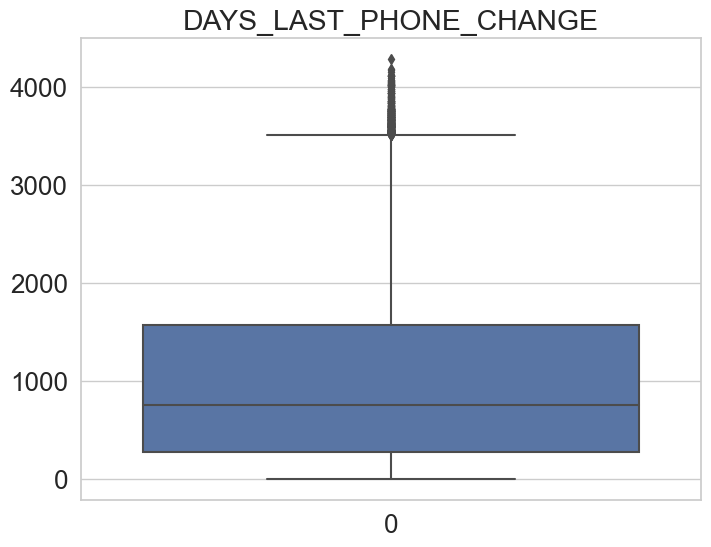

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [202]:
for (columnName, columnData) in app_data.iteritems():
    plt.figure(figsize=[8, 6])
    if (columnData.dtype != object and columnName not in 
        ["TARGET", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", 
         "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", 
         "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR",
          "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", 
          "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", 
          "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
          "REG_CITY_NOT_LIVE_CITY", "LIVE_CITY_NOT_WORK_CITY", "REG_CITY_NOT_WORK_CITY"]):
        sns.boxplot(app_data[columnName]).set(title=columnName)
        plt.show()


Выбросы явно априсутвуют в "CNT_CHILDREN", "AMT_INCOME_TOTAL", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"

Подберем пороговые значения для удаления выбрасов


In [203]:
levels = app_data[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]].quantile(0.8).reset_index()
levels.columns = ["column", "level"]
levels

,column,level
0,CNT_CHILDREN,1.0
1,AMT_INCOME_TOTAL,225000.0
2,DAYS_EMPLOYED,9188.0
3,CNT_FAM_MEMBERS,3.0
4,OBS_30_CNT_SOCIAL_CIRCLE,3.0
5,DEF_30_CNT_SOCIAL_CIRCLE,0.0
6,OBS_60_CNT_SOCIAL_CIRCLE,3.0
7,DEF_60_CNT_SOCIAL_CIRCLE,0.0


In [204]:
for (index, data) in levels.iterrows():
    app_data = app_data.drop(app_data[app_data[data.column] > data.level].index)

app_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,815.0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2.0,0.0,617.0,1,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,1106.0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0.0,0.0,2536.0,1,0.000000,0.000,0.000000,0.000000,1.000000,1.000000
6,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,1.0,0.0,1562.0,0,0.000000,0.000,0.000000,1.000000,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,...,0.0,0.0,1516.0,1,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
307504,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,0.0,0.0,0.0,1,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0.0,0.0,273.0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,322.0,1,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [205]:
app_data[["DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]].describe()

,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,139076.0,139076.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


"DEF_30_CNT_SOCIAL_CIRCLE" и "DEF_60_CNT_SOCIAL_CIRCLE" теперь пустые. Удаляем.

In [206]:
app_data.drop(["DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"], axis=1, inplace=True)
app_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,815.0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2.0,2.0,617.0,1,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,1106.0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0.0,0.0,2536.0,1,0.000000,0.000,0.000000,0.000000,1.000000,1.000000
6,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,1.0,1.0,1562.0,0,0.000000,0.000,0.000000,1.000000,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,...,0.0,0.0,1516.0,1,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
307504,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,0.0,0.0,0.0,1,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0.0,0.0,273.0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,322.0,1,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


### Нормализация данных

In [207]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139076 entries, 2 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       139076 non-null  int64  
 1   NAME_CONTRACT_TYPE           139076 non-null  object 
 2   CODE_GENDER                  139076 non-null  object 
 3   FLAG_OWN_CAR                 139076 non-null  object 
 4   FLAG_OWN_REALTY              139076 non-null  object 
 5   CNT_CHILDREN                 139076 non-null  int64  
 6   AMT_INCOME_TOTAL             139076 non-null  float64
 7   AMT_CREDIT                   139076 non-null  float64
 8   AMT_ANNUITY                  139076 non-null  float64
 9   AMT_GOODS_PRICE              139076 non-null  float64
 10  NAME_TYPE_SUITE              139076 non-null  object 
 11  NAME_INCOME_TYPE             139076 non-null  object 
 12  NAME_EDUCATION_TYPE          139076 non-null  object 
 13 

In [208]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
encoded_data = app_data.copy().reset_index().drop(["index"], axis=1)
encoded_data["CODE_GENDER"] = label_encoder.fit_transform(
    encoded_data["CODE_GENDER"])
encoded_data["NAME_CONTRACT_TYPE"] = label_encoder.fit_transform(
    encoded_data["NAME_CONTRACT_TYPE"])
encoded_data["FLAG_OWN_CAR"] = label_encoder.fit_transform(
    encoded_data["FLAG_OWN_CAR"])
encoded_data["FLAG_OWN_REALTY"] = label_encoder.fit_transform(
    encoded_data["FLAG_OWN_REALTY"])


In [209]:
encoded_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,815.0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,2.0,2.0,617.0,1,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
2,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,1106.0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,...,0.0,0.0,2536.0,1,0.000000,0.000,0.000000,0.000000,1.000000,1.000000
4,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,...,1.0,1.0,1562.0,0,0.000000,0.000,0.000000,1.000000,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139071,0,0,0,0,1,1,94500.0,225000.0,10620.0,225000.0,...,0.0,0.0,1516.0,1,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
139072,0,0,0,0,1,0,153000.0,331920.0,16096.5,225000.0,...,0.0,0.0,0.0,1,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
139073,0,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,...,0.0,0.0,273.0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
139074,1,0,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,322.0,1,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [210]:
for (columnName, columnData) in app_data.iteritems():
    if (columnData.dtype == object):
        encoder = OneHotEncoder()
        array = encoded_data[columnName].values.reshape(-1, 1)
        encoder.fit(array)
        column_names = encoder.get_feature_names_out().tolist()
        for i in range(0, len(column_names)):
            column_names[i] = column_names[i].replace(
                "x0", columnName)
        encoded_df = pd.DataFrame(encoder.transform(
            array).toarray(), columns=column_names)

        for (encded_column, _) in encoded_df.items():
            encoded_df[encded_column] = encoded_df[encded_column].astype(int)

        encoded_data = pd.concat([encoded_data, encoded_df],
                            axis=1).drop([columnName], axis=1)

C:\Users\roman\AppData\Local\Temp\ipykernel_50716\1587428525.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in app_data.iteritems():


In [211]:
encoded_data

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,13778,3130,1213.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139071,0,1,94500.0,225000.0,10620.0,225000.0,0.010966,16063,8736,8672.0,...,0,0,0,0,0,0,0,0,0,0
139072,0,0,153000.0,331920.0,16096.5,225000.0,0.022625,16705,7258,9798.0,...,0,0,0,0,0,0,0,0,0,0
139073,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,236,8456.0,...,0,0,0,0,0,0,0,0,0,0
139074,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,4786,2562.0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
encoded_data["DAYS_EMPLOYED"] = encoded_data["DAYS_EMPLOYED"].astype(float)
encoded_data["DAYS_BIRTH"] = encoded_data["DAYS_BIRTH"].astype(float)
encoded_data["DAYS_ID_PUBLISH"] = encoded_data["DAYS_ID_PUBLISH"].astype(float)
encoded_data["REGION_RATING_CLIENT"] = encoded_data["REGION_RATING_CLIENT"].astype(float) # 1, 2 ,3
encoded_data["REGION_RATING_CLIENT_W_CITY"] = encoded_data["REGION_RATING_CLIENT_W_CITY"].astype(float) # 1, 2 ,3
encoded_data["DAYS_ID_PUBLISH"] = encoded_data["DAYS_ID_PUBLISH"].astype(float)
encoded_data["HOUR_APPR_PROCESS_START"] = encoded_data["HOUR_APPR_PROCESS_START"].astype(float)

Разбика на множество для обучения и валидации

In [213]:
from sklearn.model_selection import train_test_split

_encoders = dict()

def scale_values(data):
    for (columnName, columnData) in data.iteritems():
        if (columnData.dtype == float):
            if (columnName in _encoders):
                data[columnName] = _encoders[columnName].transform(data[columnName].values.reshape(-1, 1))
            else:
                encoder = _encoders[columnName] = StandardScaler()
                data[columnName] = encoder.fit_transform(data[columnName].values.reshape(-1, 1))

y = encoded_data["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(encoded_data.drop(
    ['TARGET'], axis=1), y, train_size=0.7, random_state=70, stratify=y)

scale_values(X_test)
scale_values(X_train)

C:\Users\roman\AppData\Local\Temp\ipykernel_50716\1942126391.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in data.iteritems():
C:\Users\roman\AppData\Local\Temp\ipykernel_50716\1942126391.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in data.iteritems():


## Снижение размерности для визуализации данных

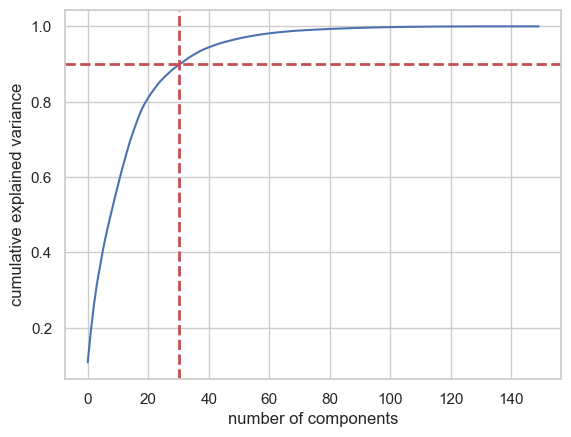

In [215]:
pca_test = PCA(n_components=150)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=2, color='r', linestyle = '--', x=30, ymin=0, ymax=1)
plt.axhline(linewidth=2, color='r', linestyle = '--', y=0.9, xmin=0, xmax=150)
plt.show()

30 параметров данных вносят 90% результата

In [ ]:
pca = PCA(n_components=30)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.fit_transform(X_test)

In [ ]:
tsne = TSNE(2, learning_rate='auto', init='pca', n_jobs=-1)
transformed = tsne.fit_transform(X_train[:10000])

c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: >

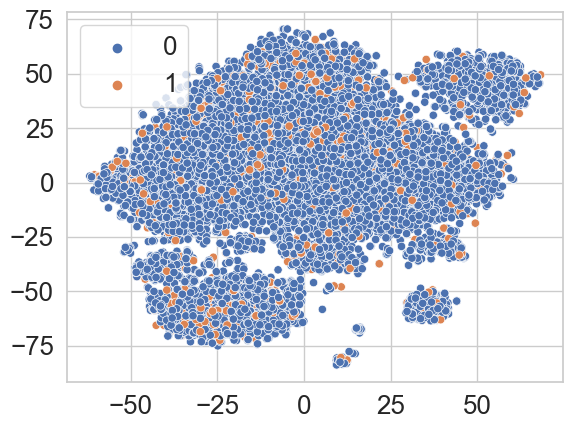

In [ ]:
sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1],
               hue=y_train.to_list()[:10000])

Из результат визуализации TSNE ничего не понятно.

## Классификация

Для классификаци воспользуемся RandomForestClassifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, confusion_matrix
model = RandomForestClassifier(n_jobs=-1, n_estimators=200)

In [ ]:
model.fit(X_train_transformed,y_train)
predict_train = model.predict(X_train_transformed)
predict_test = model.predict(X_test_transformed)
print("Train")
print(classification_report(y_train, predict_train, zero_division=1))
print("Test")
print(classification_report(y_test, predict_test, zero_division=1))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88773
           1       1.00      1.00      1.00      8580

    accuracy                           1.00     97353
   macro avg       1.00      1.00      1.00     97353
weighted avg       1.00      1.00      1.00     97353

Test
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38046
           1       1.00      0.00      0.00      3677

    accuracy                           0.91     41723
   macro avg       0.96      0.50      0.48     41723
weighted avg       0.92      0.91      0.87     41723



In [ ]:
confusion_matrix(y_train, predict_train)

array([[88773,     0],
       [    0,  8580]], dtype=int64)

In [ ]:
confusion_matrix(y_test, predict_test)

array([[38046,     0],
       [ 3677,     0]], dtype=int64)

## Заключение

В результате преобработки данных количество столбцов было сокращено с 121 до 43. Преобразование категориальных данных расширили это количество до 153.

Выполнить хоть какую-то внятную визуализацию данных не удалось.

Метод PCA показывает, что для построения модели классификации достатоно всего 30 компонетов, что в 5 раз меньше полученных параметров.

Модель, основанная на RandomForestClassifier, обучалась на 70% набора данных и показала точность ~96% на тестовых данных, но не опредлила ниодного значения для TARGET = 1. Значит модель переобучена.

Что делать с такой моделью не понятно. Как правильно ее обучить - тоже.